In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

In [2]:
# Load the dataset
file_path = '/content/data.xlsx'  # Update this path to the correct location of your Excel file
df = pd.read_excel(file_path)


In [3]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [4]:
# Data Preprocessing
# Check for missing values
print("Checking for missing values:")
print(df.isnull().sum())

Checking for missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [5]:

# Handle missing values if necessary (this is an example, adjust as needed)
# df.fillna(df.median(), inplace=True)

In [6]:

# Encode categorical variables if necessary (example: one-hot encoding)
df = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)

# Split the data into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

In [7]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (302, 19)
Shape of y: (302,)


In [10]:
print(X)
print(y)


     age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  ca   cp_1   cp_2  \
0     63    1       145   233    1      150      0      2.3   0  False  False   
1     37    1       130   250    0      187      0      3.5   0  False   True   
2     41    0       130   204    0      172      0      1.4   0   True  False   
3     56    1       120   236    0      178      0      0.8   0   True  False   
4     57    0       120   354    0      163      1      0.6   0  False  False   
..   ...  ...       ...   ...  ...      ...    ...      ...  ..    ...    ...   
297   57    0       140   241    0      123      1      0.2   0  False  False   
298   45    1       110   264    0      132      0      1.2   0  False  False   
299   68    1       144   193    1      141      0      3.4   2  False  False   
300   57    1       130   131    0      115      1      1.2   1  False  False   
301   57    0       130   236    0      174      0      0.0   1   True  False   

      cp_3  restecg_1  rest

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [13]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:

# Make predictions on the test set
y_pred = model.predict(X_test)


In [15]:

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [16]:

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.8852459016393442
Confusion Matrix:
[[26  3]
 [ 4 28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [17]:

# Save the model
joblib.dump(model, 'heart_attack_prediction_model.pkl')
print("Model saved as 'heart_attack_prediction_model.pkl'")


Model saved as 'heart_attack_prediction_model.pkl'


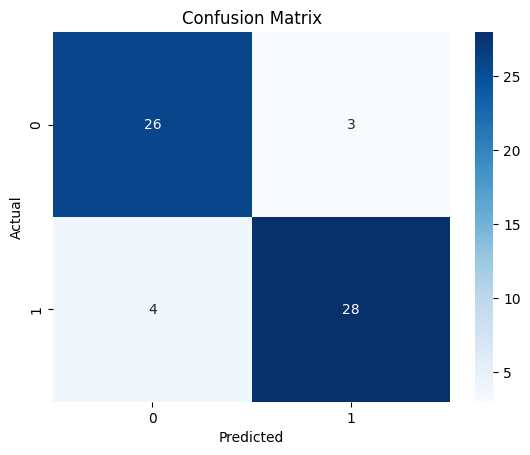

In [18]:

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# **Usage code**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib

# Load the saved model
model = joblib.load('heart_attack_prediction_model.pkl')

# Load new data (example, update this path as needed)
new_data_path = '/path/to/new_data.xlsx'
new_data = pd.read_excel(new_data_path)

# Display the first few rows of the new data
print("First few rows of the new data:")
print(new_data.head())

# Preprocess the new data (must be done in the same way as the training data)
# Encoding categorical variables if necessary (example: one-hot encoding)
new_data = pd.get_dummies(new_data, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)

# Ensure all necessary columns are present
missing_cols = set(X.columns) - set(new_data.columns)
for col in missing_cols:
    new_data[col] = 0
new_data = new_data[X.columns]  # Reorder columns to match training data

# Standardize the features
scaler = StandardScaler()
new_data_scaled = scaler.fit_transform(new_data)

# Make predictions on the new data
predictions = model.predict(new_data_scaled)

# Add predictions to the new data
new_data['prediction'] = predictions

# Display the predictions
print("Predictions on the new data:")
print(new_data[['age', 'sex', 'prediction']])  # Display relevant columns along with predictions

# Save the predictions to a new Excel file (optional)
output_path = '/path/to/predictions.xlsx'
new_data.to_excel(output_path, index=False)
print(f"Predictions saved to {output_path}")
